In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
def clover_distribution(x, y):
    r0 = 1.248
    a, b = r0 ** 4, (1+r0 ** 6) ** (-3/2)
    x2, y2 = x**2, y**2

    if x2 + y2 < r0 ** 2:
        return 3 / (10 * np.pi) * a * b * (5 + (4*(x2 + y2)**2 - 32*x2*y2) / (r0 * (x2 + y2) ** (-3/2)))
    else:
        return 3 / (10 * np.pi) * (9 * (x2 + y2)**2 - 32*x2*y2) / (r0 * (x2 + y2) ** (-3/2))


def rejection_sampling(n_samples=1000):
    # Sample X, Y from the square
    X, Y = np.random.uniform(-1.5, 1.5, size=(2, n_samples))
    Z = np.random.uniform(0, 1.5, size=n_samples)

    # Sample X, Y from the circle
    # X, Y = np.random.normal(size=(2, n_samples))
    # Z = np.random.normal(size=n_samples)

    pass

    # X, Y = np.linspace(-30, 30, 1000), np.linspace(-30, 30, 1000)
    # Z = np.zeros((X.shape[0], Y.shape[0]))
    # for i, x in enumerate(X):
    #     for j, y in enumerate(Y):
    #         x2, y2 = x**2, y**2
    #         if x2 + y2 < r0:
    #             Z[i, j] = 3 / (10 * np.pi) * a * b * (5 + (4*(x2 + y2)**2 - 32*x2*y2) / (r0 * (x2 + y2) ** (-3/2)))
    #         else:
    #             Z[i, j] = 3 / (10 * np.pi) * (9 * (x2 + y2)**2 - 32*x2*y2) / (r0 * (x2 + y2) ** (-3/2))
    # return X, Y, Z

    # Sample X, Y from the sphere
    # X, Y = np.random.normal(size=(2, n_samples))
    # Z = (9 - 32 * X**2 * Y**2) / (10 * np.pi)

    # return X, Y, Z

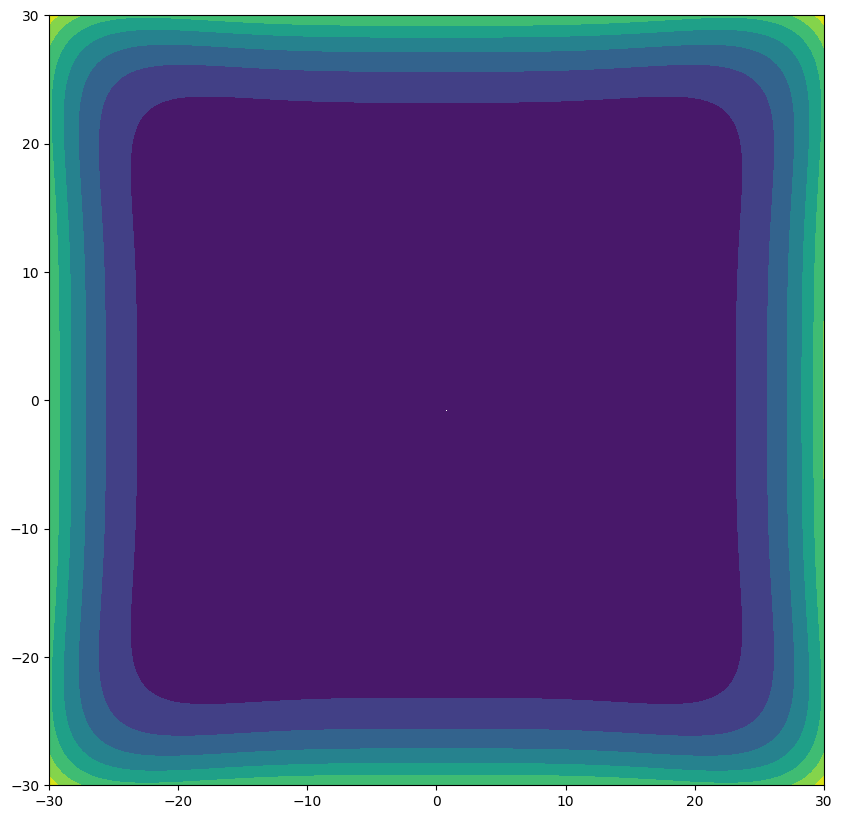

In [3]:
# 3D plot of the clover distribution

X, Y = np.linspace(-30, 30, 250), np.linspace(-30, 30, 250)
Z = np.zeros((X.shape[0], Y.shape[0]))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Z[i, j] = clover_distribution(x, y)

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, Z, cmap='viridis')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

plt.figure(figsize=(10, 10))
# Plot 2d contour
plt.contourf(X, Y, Z, cmap='viridis')

plt.show()



In [4]:
X, Y, Z = clover_distribution(10000)

print(X.shape, Y.shape, Z.shape)

# Plot the density
plt.figure(figsize=(8, 8))
plt.scatter(X, Y, c=Z, cmap='viridis')
# plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.show()

TypeError: clover_distribution() missing 1 required positional argument: 'y'

In [ ]:
# Import gamma function
from scipy.special import gamma
# Import gamma distribution
from scipy.stats import gamma as gamma_dist

def shi_probabilities(dim, alpha):
    p = np.zeros(dim)
    p[0] = gamma(dim - alpha) / (gamma(dim) * gamma(1 - alpha))
    if dim == 1:
        return p

    if dim == 2:
        p[1] = alpha
        return p

    q = shi_probabilities(dim - 1, alpha)
    for j in range(2, dim):
        p[j - 1] = ((dim - 1 - alpha * j) * q[j - 1] + alpha * (j - 1) * q[j - 2]) / (dim - 1)

    p[dim - 1] = alpha ** dim

    return p

def shi_cumulative_probabilities(dim, alpha):
    return np.cumsum(shi_probabilities(dim, alpha))

def generate_multivariate_logistic(n_samples, dim, alpha=1.0):
    W = np.random.exponential(size=(n_samples, dim))
    SW = np.sum(W, axis=1)
    T = W / SW[:, None]

    print(W.shape, SW.shape, T.shape)

    U = np.random.uniform(size=n_samples)
    P = shi_cumulative_probabilities(dim, alpha)

    Z = np.zeros(n_samples)
    for i, u in enumerate(U):
        for k, p in enumerate(P):
            if u < p:
                break

        # print(k, end=' ')
        # Generate a gamma distribution with shape k and scale 1
        Z[i] = gamma_dist.rvs(k, scale=1)

    X = 1 / (Z[:, None] * T ** alpha)
    # print()
    print(X.shape)

    return X

def generate_bivariate_logistic(n_samples, alpha):
    W = np.random.exponential(size=(n_samples, 2))
    SW = np.sum(W, axis=1)
    T = W / SW[:, None]

    print(T)

    Z = np.random.gamma(shape=2, scale=1.0, size=n_samples)

    X = np.zeros((n_samples, 2))
    for t, z in zip(T, Z):
        X += 1 / (z * t ** alpha)

    return X

[[0.61685307 0.38314693]
 [0.66882581 0.33117419]
 [0.88515391 0.11484609]
 ...
 [0.85225889 0.14774111]
 [0.74795184 0.25204816]
 [0.51973915 0.48026085]]


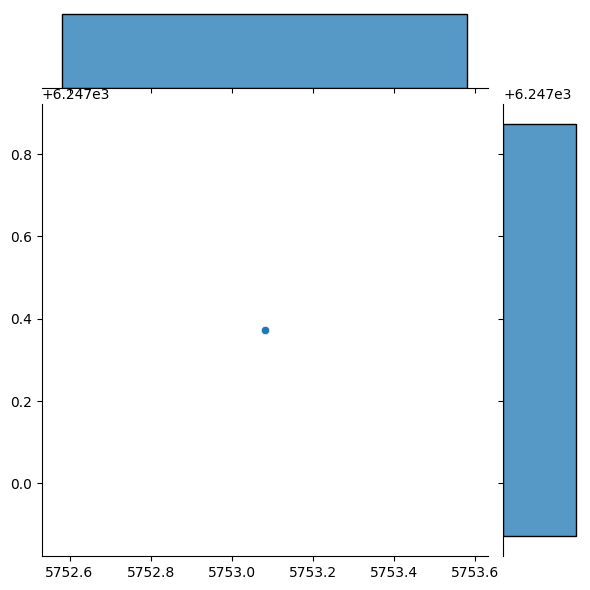

(array([[5753.0814041 , 6247.37268936],
        [5753.0814041 , 6247.37268936],
        [5753.0814041 , 6247.37268936],
        ...,
        [5753.0814041 , 6247.37268936],
        [5753.0814041 , 6247.37268936],
        [5753.0814041 , 6247.37268936]]),
 5753.081404096481,
 6247.372689355894)

In [ ]:

dataset = generate_bivariate_logistic(1000, 1)

sns.jointplot(x=dataset[:, 0], y=dataset[:, 1], kind='scatter')
plt.show()
dataset, np.max(dataset[:, 0]), np.max(dataset[:, 1])

In [ ]:
shi_probabilities(3, 0.5), shi_cumulative_probabilities(3, 0.5)

(array([0.375, 0.375, 0.125]), array([0.375, 0.75 , 0.875]))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

def generate_positive_stable(n_samples, alpha=1):
    """Generate a positive stable distribution.

    Parameters
    ----------
    n_samples : int
        Number of samples to generate.
    alpha : float
        Stability parameter.

    Returns
    -------
    X : array, shape (n_samples,)
        Samples from the positive stable distribution.
    """
    U = np.random.uniform(size=n_samples, low=0, high=np.pi)
    W = np.random.exponential(size=n_samples)

    if alpha == 1.0:
        S = np.sin(alpha*U) / (np.sin(U)**(1/alpha))
    else:
        A = (np.sin((1-alpha)*U) / W)
        S = A ** ((1-alpha)/alpha) * np.sin(alpha*U) / (np.sin(U)**(1/alpha))
    return S

def generate_extreme_multivariate(n_samples, dim, alpha=1):
    """Generate a multivariate normal distribution with extreme values.

    Parameters
    ----------
    n_samples : int
        Number of samples to generate.
    dim : int
        Dimension of the multivariate normal distribution.

    Returns
    -------
    X : array, shape (n_samples, dim)
        Samples from the multivariate normal distribution.
    """
    S = generate_positive_stable(n_samples, alpha=alpha)[:, np.newaxis]#.repeat(dim).reshape(n_samples, dim)
    W = np.random.exponential(size=(n_samples, dim))
    X = (S / W) ** alpha
    return X

(0.0, 100.0)

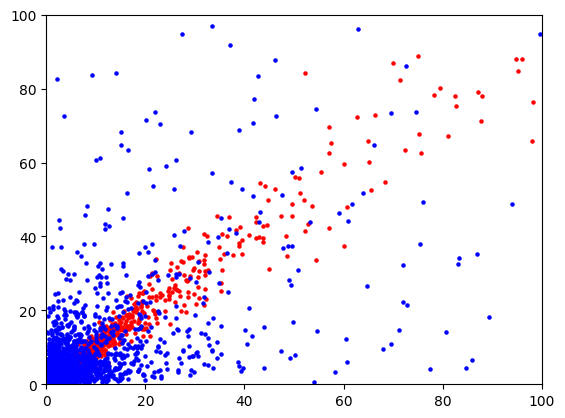

In [ ]:
train_dataset_positive = generate_extreme_multivariate(n_samples=5000, dim=2, alpha=0.1)
train_dataset_negative = generate_extreme_multivariate(n_samples=5000, dim=2, alpha=0.5)

test_dataset_positive = generate_extreme_multivariate(n_samples=50000, dim=2, alpha=0.1)
test_dataset_negative = generate_extreme_multivariate(n_samples=50000, dim=2, alpha=0.5)

train_dataset = np.concatenate((train_dataset_positive, train_dataset_negative))
test_dataset = np.concatenate((test_dataset_positive, test_dataset_negative))

# sns.jointplot(x=dataset[:, 0], y=dataset[:, 1], kind='scatter')
# plt.show()
plt.scatter(train_dataset_positive[:, 0], train_dataset_positive[:, 1], s=5, c='r')
plt.scatter(train_dataset_negative[:, 0], train_dataset_negative[:, 1], s=5, c='b')
plt.xlim(0, 100)
plt.ylim(0, 100)

In [ ]:
def ranktransformation(X):
    """Compute the rank transformation of a vector.

    Parameters
    ----------
    x : array, shape (n_samples,)
        Vector to transform.

    Returns
    -------
    y : array, shape (n_samples,)
        Rank transformation of the vector.
    """
    empirical_cdfs = []
    V = np.zeros(X.shape)
    dim = X.shape[1]
    for i in range(dim):
        empirical_cdfs.append(np.argsort(np.argsort(X[:, i])) / X.shape[0])
        V[:, i] = 1 / (1 - empirical_cdfs[i])

    return empirical_cdfs, V

(0.0, 100.0)

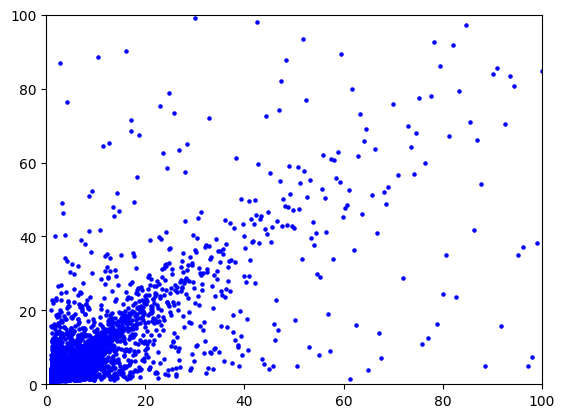

In [ ]:
_, train_dataset = ranktransformation(train_dataset)
_, test_dataset = ranktransformation(test_dataset)

plt.scatter(train_dataset[:, 0], train_dataset[:, 1], s=5, c='b')
plt.xlim(0, 100)
plt.ylim(0, 100)

In [ ]:
import pandas as pd

def create_dataframe(dataset):
    dataframe = pd.DataFrame(dataset)
    # Set labels so that the first half of the dataset is labeled 0 and the second half is labeled 1
    dataframe['label'] = np.concatenate((np.zeros(dataset.shape[0] // 2), np.ones(dataset.shape[0] // 2)))
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)
    return dataframe

train_dataframe = create_dataframe(train_dataset)
test_dataframe = create_dataframe(test_dataset)

print("Shape of the training dataset: ", train_dataframe.shape)
print("Shape of the test dataset: ", test_dataframe.shape)

Shape of the training dataset:  (10000, 3)
Shape of the test dataset:  (100000, 3)


Text(0.5, 1.0, 'Sample from the test dataset in [0, 120] x [0, 120]')

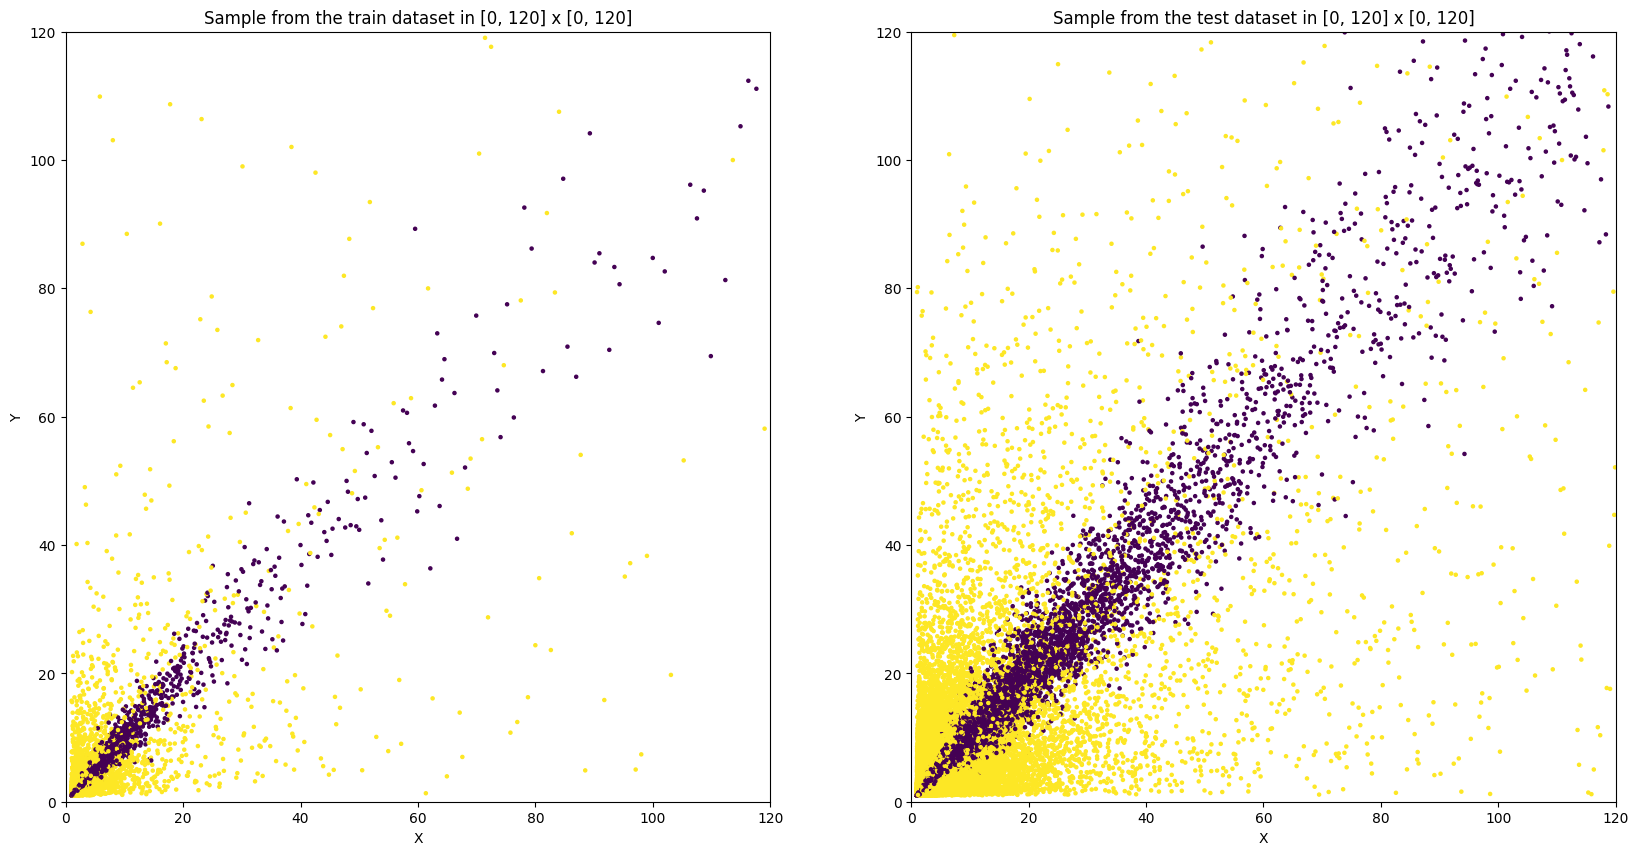

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(train_dataframe[0], train_dataframe[1], s=5, c=train_dataframe['label'])
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample from the train dataset in [0, 120] x [0, 120]')

plt.subplot(1, 2, 2)
plt.scatter(test_dataframe[0], test_dataframe[1], s=5, c=test_dataframe['label'])
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample from the test dataset in [0, 120] x [0, 120]')

In [ ]:
def extract_extreme_dataset(train_dataframe, test_dataframe, k):
    # Compute the L1 norm of each sample
    train_dataframe["norm"] = train_dataframe.apply(lambda x: np.linalg.norm(x[:2], ord=1), axis=1)
    test_dataframe["norm"] = test_dataframe.apply(lambda x: np.linalg.norm(x[:2], ord=1), axis=1)

    # Sort the dataframe by decreasing order based on the L1 norm
    train_dataframe = train_dataframe.sort_values(by="norm", ascending=False).reset_index(drop=True)
    test_dataframe = test_dataframe.sort_values(by="norm", ascending=False).reset_index(drop=True)

    # Extract the k most extreme samples
    t = train_dataframe.iloc[k]["norm"]
    train_dataframe = train_dataframe[:k]
    # Get only the test samples that are more extreme than the k-th train sample
    test_dataframe = test_dataframe[test_dataframe["norm"] > t]

    return train_dataframe, test_dataframe

In [ ]:
train_extreme_dataframe, test_extreme_dataframe = extract_extreme_dataset(train_dataframe, test_dataframe, 100)

In [ ]:
print("Shape of the training dataset: ", train_extreme_dataframe.shape)
print("Shape of the test dataset: ", test_extreme_dataframe.shape)

Shape of the training dataset:  (100, 4)
Shape of the test dataset:  (1131, 4)


Text(0.5, 1.0, 'L1 norm of the test dataset')

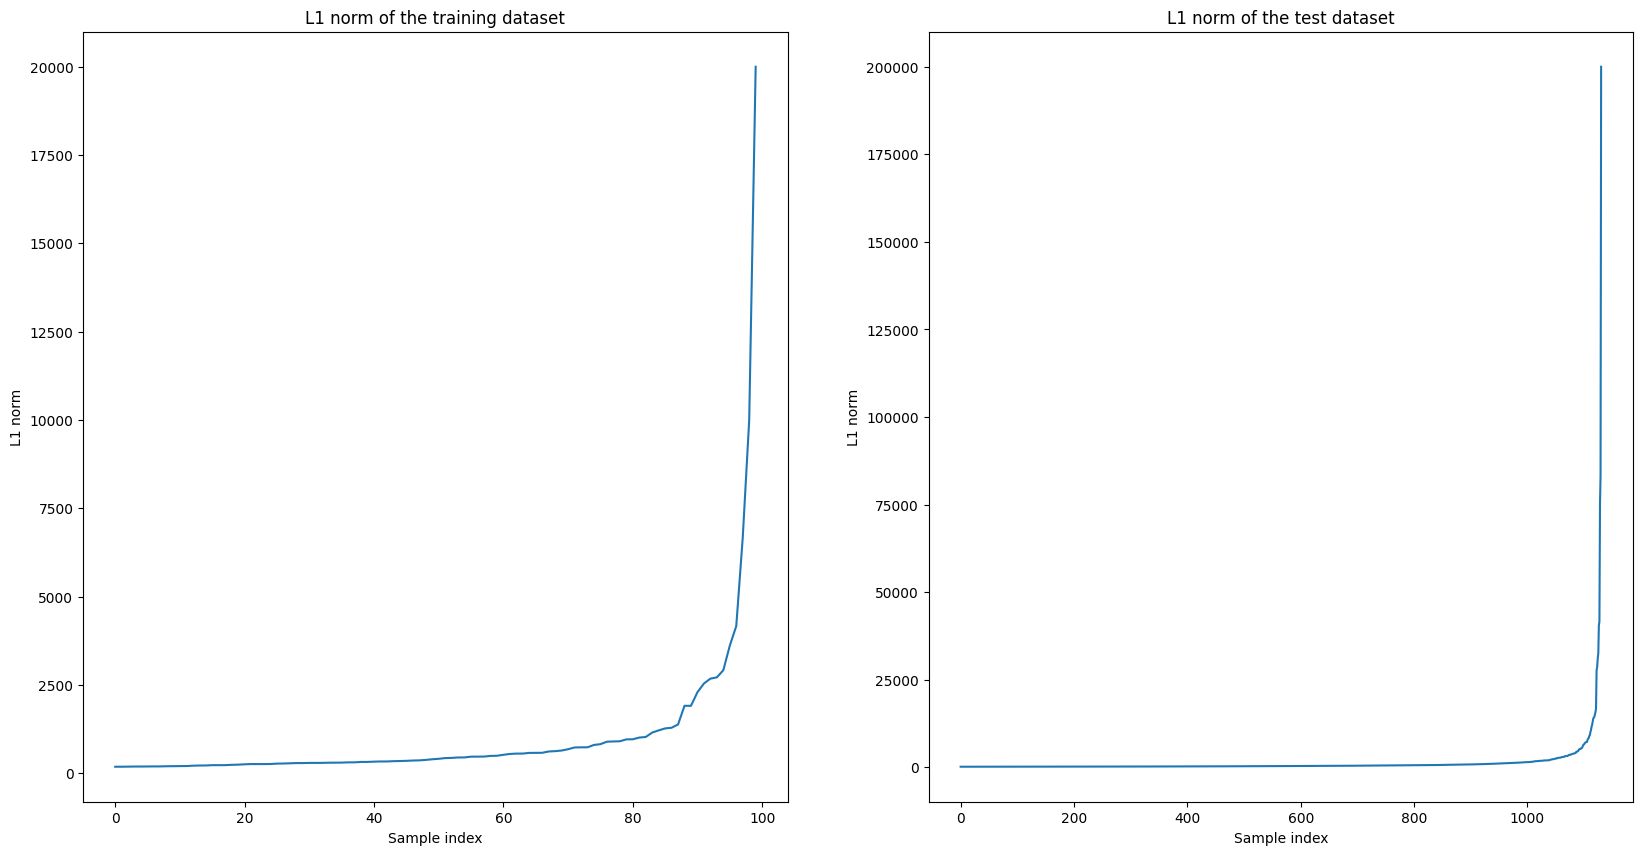

In [ ]:
# Get the norm sorted in increasing order
train_norm = train_extreme_dataframe.sort_values(by="norm", ascending=True).reset_index(drop=True)
test_norm = test_extreme_dataframe.sort_values(by="norm", ascending=True).reset_index(drop=True)

# Plot the norm of the samples
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_norm["norm"])
plt.xlabel('Sample index')
plt.ylabel('L1 norm')
plt.title('L1 norm of the training dataset')

plt.subplot(1, 2, 2)
plt.plot(test_norm["norm"])
plt.xlabel('Sample index')
plt.ylabel('L1 norm')
plt.title('L1 norm of the test dataset')

Text(0.5, 1.0, 'Sample from largest 30% of the test dataset in [0, 120] x [0, 120]')

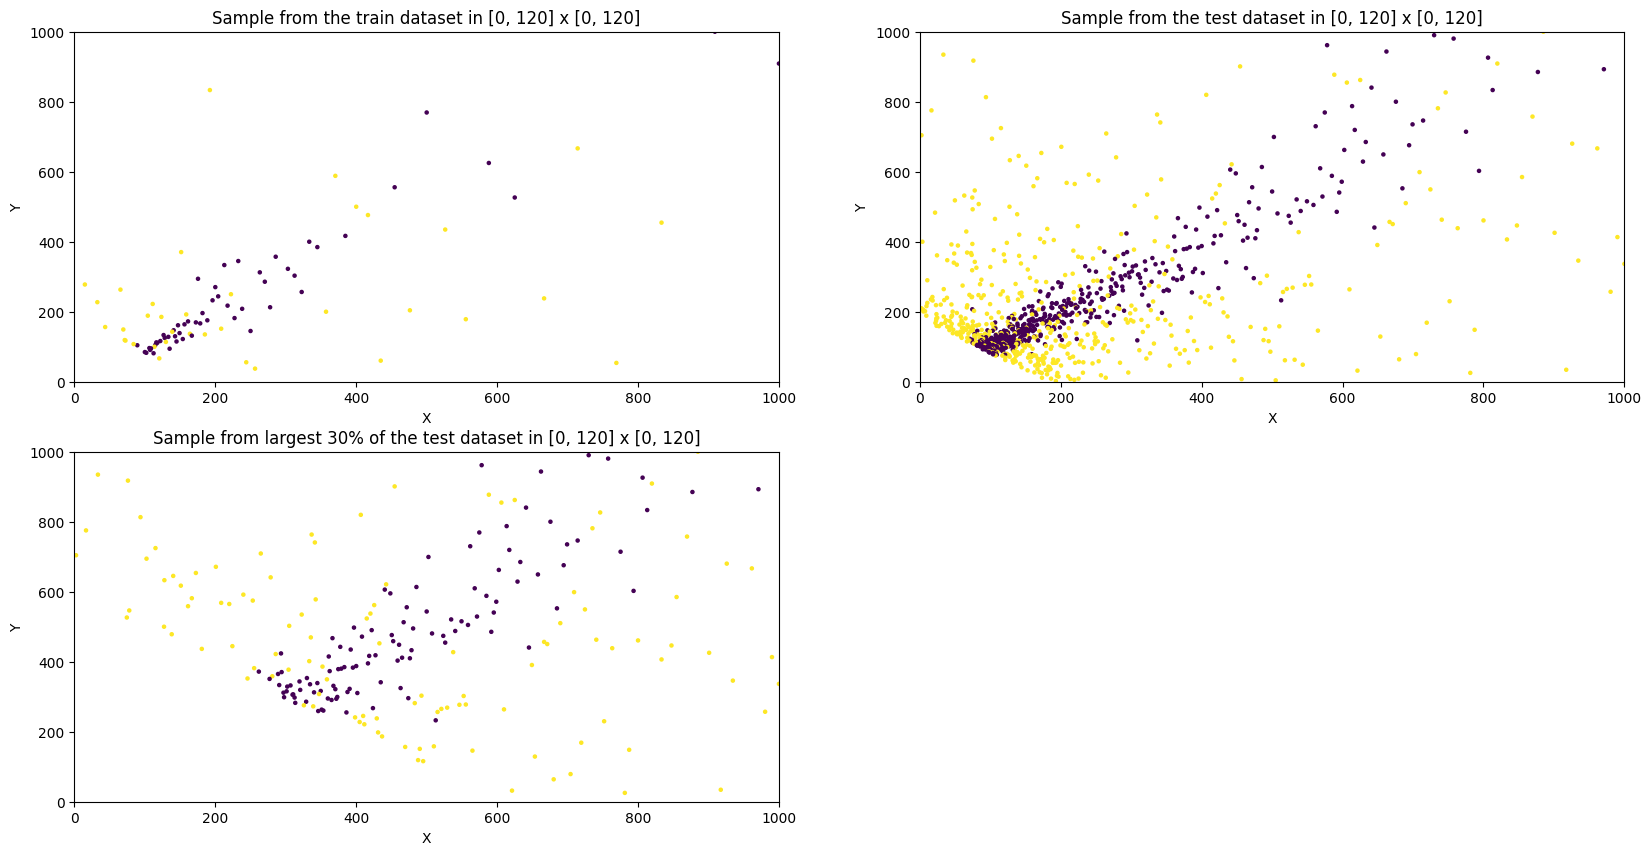

In [ ]:
plt.figure(figsize=(20, 10))

max_lim = 1000

plt.subplot(2, 2, 1)
plt.scatter(train_extreme_dataframe[0], train_extreme_dataframe[1], s=5, c=train_extreme_dataframe['label'])
plt.xlim(0, max_lim)
plt.ylim(0, max_lim)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample from the train dataset in [0, 120] x [0, 120]')

plt.subplot(2, 2, 2)
plt.scatter(test_extreme_dataframe[0], test_extreme_dataframe[1], s=5, c=test_extreme_dataframe['label'])
plt.xlim(0, max_lim)
plt.ylim(0, max_lim)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample from the test dataset in [0, 120] x [0, 120]')

kappa = 0.3
test_extreme_dataframe_kappa = test_extreme_dataframe[:int(len(test_extreme_dataframe) * kappa)]

plt.subplot(2, 2, 3)
plt.scatter(test_extreme_dataframe_kappa[0], test_extreme_dataframe_kappa[1], s=5, c=test_extreme_dataframe_kappa['label'])
plt.xlim(0, max_lim)
plt.ylim(0, max_lim)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample from largest 30% of the test dataset in [0, 120] x [0, 120]')

In [ ]:
print("Shape of the train dataset: {}".format(train_extreme_dataframe.shape))
print("Shape of the test dataset: {}".format(test_extreme_dataframe.shape))

Shape of the train dataset: (100, 4)
Shape of the test dataset: (1131, 4)


In [ ]:
# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Create the kNN classifier
knn_extreme = KNeighborsClassifier(n_neighbors=5)
knn_extreme.fit(train_extreme_dataframe[[0, 1]], train_extreme_dataframe['label'])

# Predict the labels of the extreme dataset
kappas = np.linspace(0.3, 1.0, 20)

accuracies_extreme = []
hamming_losses_extreme = []
for kappa in kappas:
    test_extreme_dataframe_kappa = test_extreme_dataframe[:int(len(test_extreme_dataframe) * kappa)]

    # Predict the labels of the extreme dataset
    predictions = knn_extreme.predict(test_extreme_dataframe_kappa[[0, 1]])
    # Compute the accuracy
    accuracy = np.sum(predictions == test_extreme_dataframe_kappa['label']) / len(predictions)
    accuracies_extreme.append(accuracy)

    # Compute the Hamming loss
    hamming_loss = np.sum(np.abs(predictions - test_extreme_dataframe_kappa['label'])) / len(predictions)
    hamming_losses_extreme.append(hamming_loss)

    # print('~' * 10 + ' Kappa = {} '.format(kappa) + '~' * 10)
    # print(f'Accuracy: {accuracy}, Hamming loss: {hamming_loss}')

# Create the kNN classifier
knn_regular = KNeighborsClassifier(n_neighbors=5)
knn_regular.fit(train_extreme_dataframe[[0, 1]], train_extreme_dataframe['label'])

# Predict the labels of the extreme dataset
kappas = np.linspace(0.3, 1.0, 20)

accuracies_regular = []
hamming_losses_regular = []
for kappa in kappas:
    test_extreme_dataframe_kappa = test_extreme_dataframe[:int(len(test_extreme_dataframe) * kappa)]

    # Predict the labels of the extreme dataset
    predictions = knn_regular.predict(test_extreme_dataframe_kappa[[0, 1]])
    # Compute the accuracy
    accuracy = np.sum(predictions == test_extreme_dataframe_kappa['label']) / len(predictions)
    accuracies_regular.append(accuracy)

    # Compute the Hamming loss
    hamming_loss = np.sum(np.abs(predictions - test_extreme_dataframe_kappa['label'])) / len(predictions)
    hamming_losses_regular.append(hamming_loss)



Text(0.5, 1.0, 'Hamming loss of the kNN classifiers for different values of kappa')

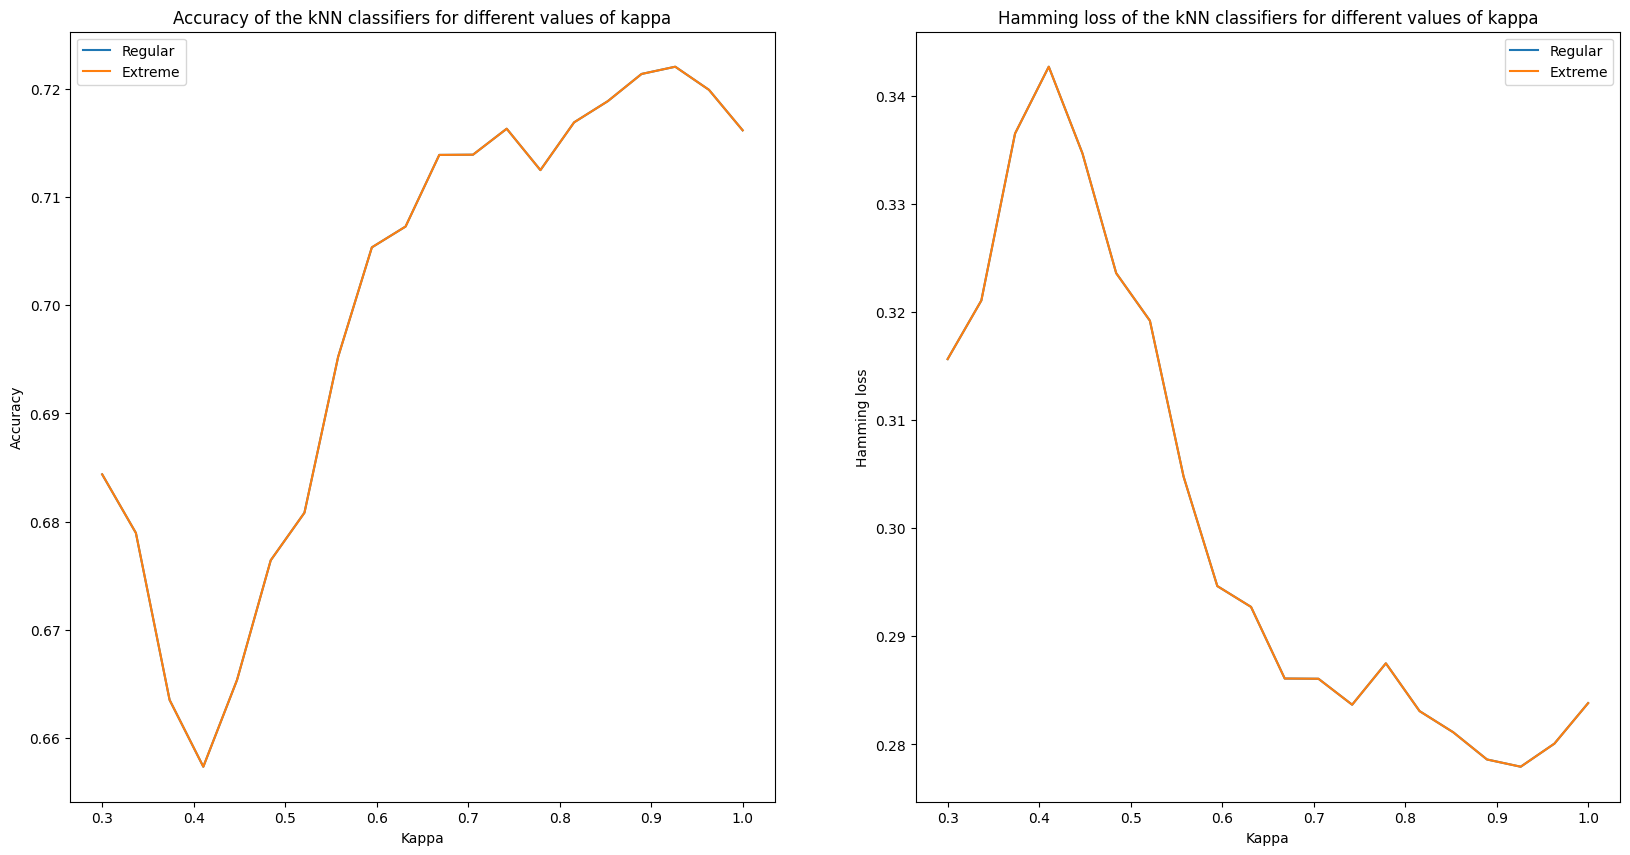

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(kappas, accuracies_regular, label='Regular')
plt.plot(kappas, accuracies_extreme, label='Extreme')
plt.legend()
plt.xlabel('Kappa')
plt.ylabel('Accuracy')
plt.title('Accuracy of the kNN classifiers for different values of kappa')

plt.subplot(1, 2, 2)
plt.plot(kappas, hamming_losses_regular, label='Regular')
plt.plot(kappas, hamming_losses_extreme, label='Extreme')
plt.legend()
plt.xlabel('Kappa')
plt.ylabel('Hamming loss')
plt.title('Hamming loss of the kNN classifiers for different values of kappa')

In [ ]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
rf_extreme = RandomForestClassifier(n_estimators=200)
rf_extreme.fit(train_extreme_dataframe[[0, 1]], train_extreme_dataframe['label'])

# Predict the labels of the extreme dataset
kappas = np.linspace(0.3, 1.0, 20)

accuracies_extreme = []
hamming_losses_extreme = []

for kappa in kappas:
    test_extreme_dataframe_kappa = test_extreme_dataframe[:int(len(test_extreme_dataframe) * kappa)]

    # Predict the labels of the extreme dataset
    predictions = rf_extreme.predict(test_extreme_dataframe_kappa[[0, 1]])
    # Compute the accuracy
    accuracy = np.sum(predictions == test_extreme_dataframe_kappa['label']) / len(predictions)
    accuracies_extreme.append(accuracy)

    # Compute the Hamming loss
    hamming_loss = np.sum(np.abs(predictions - test_extreme_dataframe_kappa['label'])) / len(predictions)
    hamming_losses_extreme.append(hamming_loss)

    # print('~' * 10 + ' Kappa = {} '.format(kappa) + '~' * 10)
    # print(f'Accuracy: {accuracy}, Hamming loss: {hamming_loss}')

rf_regular = RandomForestClassifier(n_estimators=200)
rf_regular.fit(train_dataframe[[0, 1]], train_dataframe['label'])

# Predict the labels of the extreme dataset
kappas = np.linspace(0.3, 1.0, 20)

accuracies_regular = []
hamming_losses_regular = []

for kappa in kappas:
    test_extreme_dataframe_kappa = test_extreme_dataframe[:int(len(test_extreme_dataframe) * kappa)]

    # Predict the labels of the extreme dataset
    predictions = rf_regular.predict(test_extreme_dataframe_kappa[[0, 1]])
    # Compute the accuracy
    accuracy = np.sum(predictions == test_extreme_dataframe_kappa['label']) / len(predictions)
    accuracies_regular.append(accuracy)

    # Compute the Hamming loss
    hamming_loss = np.sum(np.abs(predictions - test_extreme_dataframe_kappa['label'])) / len(predictions)
    hamming_losses_regular.append(hamming_loss)

Text(0.5, 1.0, 'Hamming loss of the Random Forest classifiers for different values of kappa')

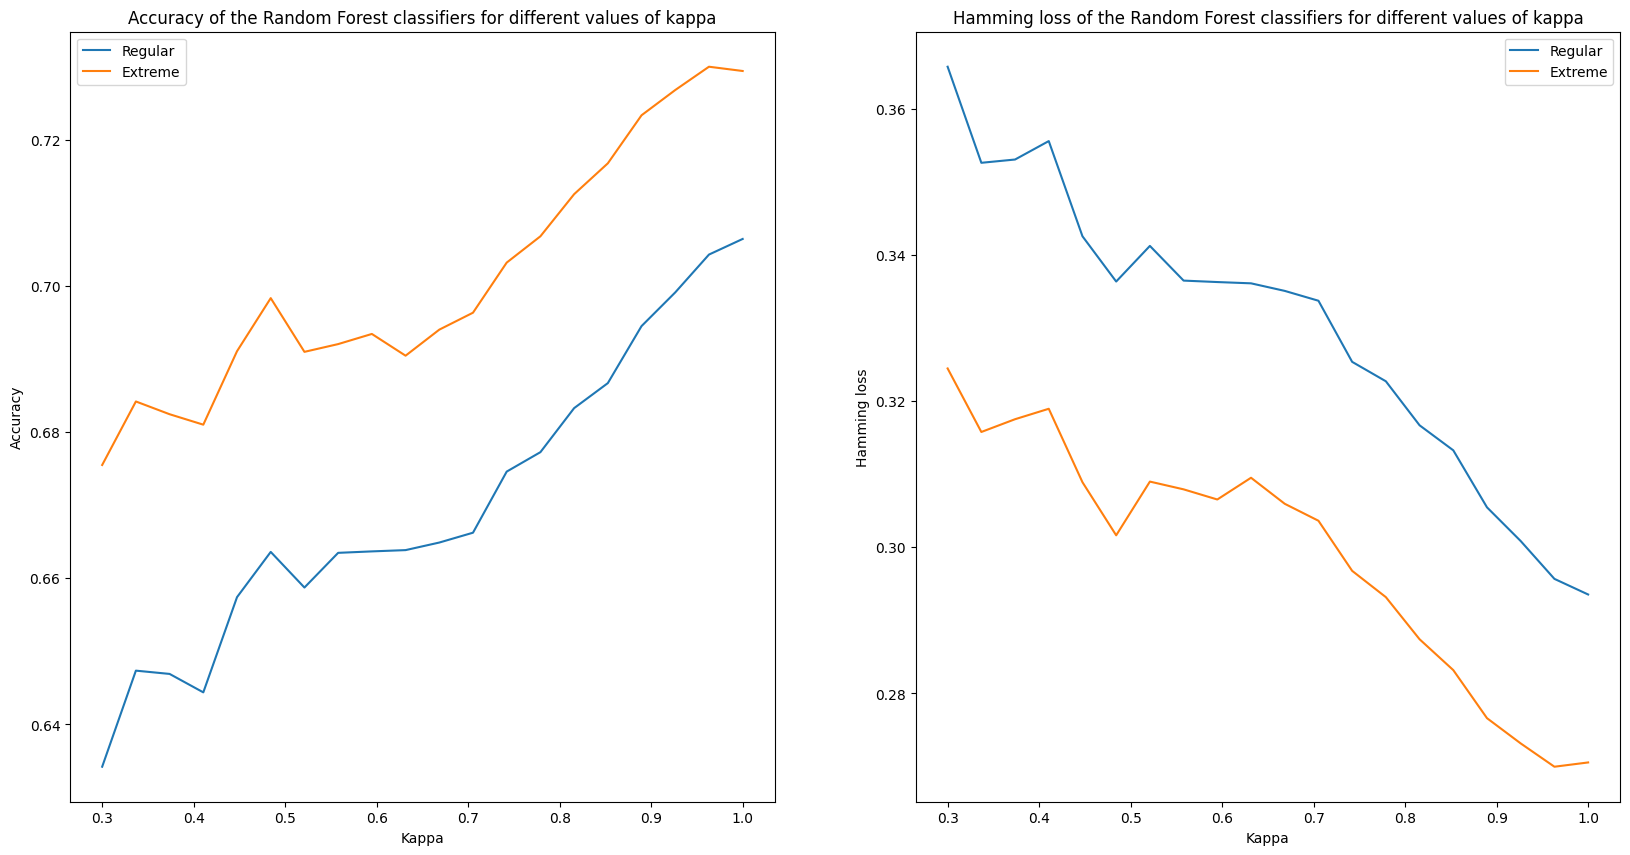

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(kappas, accuracies_regular, label='Regular')
plt.plot(kappas, accuracies_extreme, label='Extreme')
plt.legend()
plt.xlabel('Kappa')
plt.ylabel('Accuracy')
plt.title('Accuracy of the Random Forest classifiers for different values of kappa')

plt.subplot(1, 2, 2)
plt.plot(kappas, hamming_losses_regular, label='Regular')
plt.plot(kappas, hamming_losses_extreme, label='Extreme')
plt.legend()
plt.xlabel('Kappa')
plt.ylabel('Hamming loss')
plt.title('Hamming loss of the Random Forest classifiers for different values of kappa')